<a href="https://colab.research.google.com/github/razevedocosta/data_analysis/blob/master/Day_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

Este notebook apresenta as seguintes informações:
1.   Resumo das operações realizadas no mês
2.   Operações agrupadas por dia
3.   Gráfico de pizza - taxa de acerto
4.   Gráfico de barra - resultado por dia
5.   Histograma do resultado líquido

In [0]:
# informar o imposto de renda retido na fonte (para o mês positivo)
irrf = 20
total_liquido = 0

# Importação de Dados

In [0]:
import pandas as pd

dados = pd.read_csv('trade_maio.csv', sep=";")
#dados.head()

# Tratamento dos dados

In [85]:
# excluindo colunas desnecessáris
dados.drop(['Qtd', 'Saldo', 'Custos', 'Result Aber', 'TET', 'MEP', 'MEN'], inplace = True, axis=1)
dados.head()

,Papel,Abertura,Fechamento,Tempo,C/V,Prc Médio Cpa,Prc Médio Vda,Result Fech,Result Total,Data,Res. Tot. Líq.,Saldo Result.
0,WINM20,10:03:28,10:07:19,3m51s,V,"79.955,00","79.870,00",-85 pts,-85 pts,05/05/2020,"-170,00","-170,00"
1,WINM20,10:07:19,10:17:01,9m42s,C,"79.955,00","80.160,00",205 pts,205 pts,05/05/2020,"410,00","240,00"
2,WINM20,10:29:36,10:33:07,3m31s,V,"80.510,00","79.985,00",-525 pts,-525 pts,05/05/2020,"-1.050,00","-810,00"
3,WINM20,10:33:07,10:57:04,23m57s,C,"80.513,50","80.925,00","411,5 pts","411,5 pts",05/05/2020,"823,00","13,00"
4,WINM20,11:11:12,11:12:07,55s,V,"80.950,00","80.890,00",-60 pts,-60 pts,05/05/2020,"-120,00","-107,00"


In [0]:
dados['resultado'] = dados['Res. Tot. Líq.'].apply(lambda x: 'gain' if x > 0 else 'loss')

In [72]:
dados.tail(20)

,Papel,Abertura,Fechamento,Tempo,Qtd,Saldo,C/V,Prc Médio Cpa,Prc Médio Vda,Result Aber,Result Fech,Result Total,Data,Custos,Res. Tot. Líq.,Saldo Result.,TET,MEP,MEN
91,WINM20,14:45:44,14:50:21,4m37s,2,0,C,"81.405,00","81.445,00",0 pts,40 pts,40 pts,20/05/2020,"0,00",16.0,"-1.601,00",36m18s,55,-80
92,WINM20,09:16:02,09:21:13,5m11s,2,0,C,"81.270,00","81.290,00",0 pts,20 pts,20 pts,21/05/2020,"0,00",8.0,"-1.593,00",NaN,75,-30
93,WINM20,09:36:23,09:39:47,3m24s,2,0,C,"81.540,00","81.585,00",0 pts,45 pts,45 pts,21/05/2020,"0,00",18.0,"-1.575,00",20m21s,100,-45
94,WINM20,09:46:27,09:51:02,4m35s,2,0,C,"82.710,00","82.610,00",0 pts,-100 pts,-100 pts,22/05/2020,"0,00",-40.0,"-1.615,00",NaN,40,-125
95,WINM20,09:55:29,09:58:54,3m25s,2,0,V,"82.265,00","82.550,00",0 pts,285 pts,285 pts,22/05/2020,"0,00",114.0,"-1.501,00",9m2s,295,-65
96,WINM20,09:57:23,10:02:59,5m36s,2,0,V,"84.910,00","85.075,00",0 pts,165 pts,165 pts,25/05/2020,"0,00",66.0,"-1.435,00",NaN,305,-135
97,WINM20,09:30:01,09:31:11,1m10s,10,0,C,"87.165,00","87.235,00",0 pts,70 pts,70 pts,26/05/2020,"0,00",140.0,"-1.295,00",NaN,130,-15
98,WINM20,09:50:29,09:51:07,38s,2,0,C,"87.305,00","87.205,00",0 pts,-100 pts,-100 pts,26/05/2020,"0,00",-40.0,"-1.335,00",20m28s,70,-100
99,WINM20,09:56:44,09:58:16,1m32s,2,0,V,"87.130,00","87.135,00",0 pts,5 pts,5 pts,26/05/2020,"0,00",2.0,"-1.333,00",6m15s,65,-65
100,WINM20,10:14:42,10:16:54,2m12s,2,0,C,"87.360,00","87.360,00",0 pts,0 pts,0 pts,26/05/2020,"0,00",0.0,"-1.333,00",17m58s,50,-20


In [0]:
# replace para valores
dados['Res. Tot. Líq.'] = [x.replace(".", "") for x in dados['Res. Tot. Líq.']]
dados['Res. Tot. Líq.'] = [x.replace(",", ".") for x in dados['Res. Tot. Líq.']]

dados['Res. Tot. Líq.'] = dados['Res. Tot. Líq.'].astype(float)

#dados['Res. Tot. Líq.']

# Resumo do Mês

In [34]:
# criar dataframe para resumo das informações do mês

total = dados['Papel'].count()
maximo = dados['Res. Tot. Líq.'].max()
minimo = dados['Res. Tot. Líq.'].min()
total_bruto = dados['Res. Tot. Líq.'].sum()
dias_operados = dados['Data'].unique().size

ir = 0
if (total_liquido > 0):
  ir = (total_liquido * 0.2) - irrf
else:
  ir = 0

descricao = {'item': ['total_ordens','maximo','minimo','total_bruto','imposto','dias_operados'],
             'valor': [total, maximo, minimo, total_bruto, ir, dias_operados]
            }

df = pd.DataFrame(descricao, columns = ['item', 'valor'])
df

,item,valor
0,total_ordens,111.0
1,maximo,823.0
2,minimo,-1050.0
3,total_bruto,-1026.0
4,imposto,0.0
5,dias_operados,16.0


# Geral

In [0]:
# total de operações realizadas por dia
operacoes = dados.groupby(['Data'], as_index=False)['Res. Tot. Líq.'].count()
nova_coluna = operacoes['Res. Tot. Líq.']

# agrupar por data e somar o resultado líquido
resumo = dados.groupby(['Data'], as_index=False)['Res. Tot. Líq.'].sum()

# renomear o nome das colunas
resumo.rename(columns={'Data':'data', 'Res. Tot. Líq.':'resultado'}, inplace=True)

# inserir a coluna qtde_operacoes no dataFrame
resumo.insert(loc=2, column='qtde_operacoes', value=nova_coluna)

In [0]:
dados[['Data', 'Res. Tot. Líq.']]

# total de operações com gain
dfGain = dados.loc[dados['Res. Tot. Líq.'] > 0]
gain = dfGain.groupby(['Data'], as_index=False)['Res. Tot. Líq.'].count()

In [0]:
# total de operações com loss
dfLoss = dados.loc[dados['Res. Tot. Líq.'] < 0]
loss = dfLoss.groupby(['Data'], as_index=False)['Res. Tot. Líq.'].count()

In [0]:
# total de operações neutras
dfNeutro = dados.loc[dados['Res. Tot. Líq.'] == 0.0]
neutro = dfNeutro.groupby(['Data'], as_index=False)['Res. Tot. Líq.'].count()

In [71]:
# inserir as colunas gain e loss no dataFrame
resumo.insert(loc=3, column='gain', value=gain['Res. Tot. Líq.'])
resumo.insert(loc=4, column='loss', value=loss['Res. Tot. Líq.'])
resumo.insert(loc=5, column='neutro', value=neutro['Res. Tot. Líq.'])
resumo

,data,resultado,qtde_operacoes,gain,loss,neutro
0,05/05/2020,-796.0,42,17.0,22.0,3.0
1,06/05/2020,-620.0,5,2.0,3.0,1.0
2,07/05/2020,-148.0,12,4.0,8.0,1.0
3,08/05/2020,24.0,4,2.0,2.0,NaN
4,11/05/2020,142.0,4,3.0,3.0,NaN
5,13/05/2020,-71.0,7,4.0,6.0,NaN
6,14/05/2020,-96.0,11,5.0,1.0,NaN
7,15/05/2020,-82.0,1,2.0,2.0,NaN
8,19/05/2020,24.0,4,2.0,1.0,NaN
9,20/05/2020,22.0,2,2.0,1.0,NaN


In [40]:
resumo.fillna(0)

,data,resultado,qtde_operacoes,gain,loss,neutro
0,05/05/2020,-796.0,42,17.0,22.0,3.0
1,06/05/2020,-620.0,5,2.0,3.0,1.0
2,07/05/2020,-148.0,12,4.0,8.0,1.0
3,08/05/2020,24.0,4,2.0,2.0,0.0
4,11/05/2020,142.0,4,3.0,3.0,0.0
5,13/05/2020,-71.0,7,4.0,6.0,0.0
6,14/05/2020,-96.0,11,5.0,1.0,0.0
7,15/05/2020,-82.0,1,2.0,2.0,0.0
8,19/05/2020,24.0,4,2.0,1.0,0.0
9,20/05/2020,22.0,2,2.0,1.0,0.0


In [41]:
# media dos trades que foram positivos
queryGain = resumo.query('resultado > 0')
mediaGain = queryGain.resultado.mean()
mediaGain


78.7

In [42]:
# media dos trades que foram negativos
queryLoss = resumo.query('resultado < 0')
mediaLoss = queryLoss.resultado.mean()
abs(mediaLoss)

302.1666666666667

In [43]:
# payoff
pay = mediaGain / abs(mediaLoss)
pay

0.2604522890237176

# Gráficos

In [0]:
# total de operações no mês por tipo (positivo, negativo, neutro)
num = dados['Res. Tot. Líq.']
soma = 0
neg = 0
neutro = 0 

for item in num:
  if (item > 0):
    soma = soma + 1
  elif (item < 0):
    neg = neg + 1
  else:
    neutro = neutro + 1

In [45]:
resultado = {
             'item': ['positivo','negativo','neutro'],
             'valor': [soma, neg, neutro]
            }

dfResultado = pd.DataFrame(resultado, columns = ['item', 'valor'])
dfResultado

,item,valor
0,positivo,56
1,negativo,50
2,neutro,5


In [0]:
# gerar um array
import numpy as np

my_list = [soma, abs(neg), neutro]
my_array = np.array(my_list)

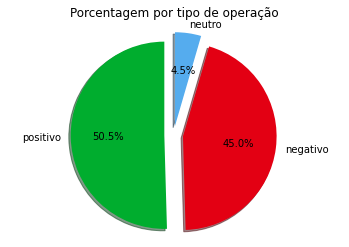

In [47]:
import matplotlib.pyplot as plt

labels = list(dfResultado['item'])
values = my_array

fig1, ax1 = plt.subplots()

c = ['#00AD2E','#E30013','#55ACEE'] # green, red, blue
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=c, explode = (0.1, 0.1, 0.1))

ax1.axis('equal')
ax1.set_title('Porcentagem por tipo de operação')
plt.show()

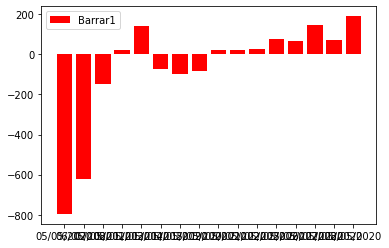

In [48]:
# Definindo variáveis
x = resumo.data
y = resumo.resultado
 
# Criando um gráfico
plt.bar(x, y, label = 'Barrar1', color = 'r')
plt.legend()
 
plt.show()

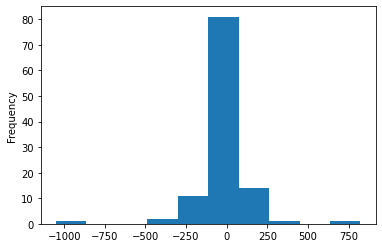

In [49]:
# histograma das inscrições pela pontuação do aluno
dados['Res. Tot. Líq.'].plot(kind='hist')

In [50]:
# definição de valores para cálculo do ir
taxas_operacionais = 25
saldo_bruto = soma

saldo_liquido = saldo_bruto - taxas_operacionais
saldo_liquido = 0.2 * saldo_bruto

print('IR DEVIDO: ', saldo_liquido)

IR DEVIDO:  11.200000000000001
